In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ca_san_diego_2020_04_01.csv').drop('raw_row_number', axis=1)
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383022,NaN,NaN,620,NaN,NaN,NaN,vehicular,NaN,True,True,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,NaN,NaN,710,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,2014-12-22,NaN,720,NaN,NaN,NaN,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,NaN,NaN,810,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN


In [3]:
from datetime import datetime

data = data.dropna(subset=['date', 'subject_sex'])
data['year'] = data.date.apply(lambda x: str(x)[:4])
data['hour'] = data.time.apply(lambda x: str(x)[:2])
monthDict={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
data['month#'] =  data.date.apply(lambda x: str(x)[5:7])#.replace(monthDict) #data['month'] =
data['monthName'] =  data.date.apply(lambda x: str(x)[5:7]).replace(monthDict) #data['month']
data['monthYr'] = data['month#'].map(str)+ '-' +data['year'].map(str)
data['monthYr'] = pd.to_datetime(data['monthYr'], format='%m-%Y').dt.strftime('%m-%Y')
# define the threshhold or our age groups
age_groups = [0, 11, 17, 25, 35, 45, 55, 65, 100]

# Giving age bins labels
age_group_names = ['<11', '11-17', '17-25', '25-35', '35-45', '45-55', '55-65', '>65']

data['subject_age_group'] = pd.cut(
    data['subject_age'], bins=age_groups, labels=age_group_names)



In [4]:
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,...,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description,year,hour,month#,monthName,monthYr,subject_age_group
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,...,NaN,Moving Violation,Citation,WHITE,2014,01,01,Jan,01-2014,17-25
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,...,NaN,Moving Violation,Verbal Warning,WHITE,2014,05,01,Jan,01-2014,35-45
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,...,NaN,Moving Violation,Verbal Warning,LAOTIAN,2014,07,01,Jan,01-2014,25-35
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,...,NaN,Moving Violation,Citation,WHITE,2014,08,01,Jan,01-2014,17-25
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,...,NaN,Equipment Violation,Citation,HISPANIC,2014,08,01,Jan,01-2014,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383003,2015-04-15,NaN,320,29.0,asian/pacific islander,female,vehicular,False,NaN,NaN,...,NaN,Moving Violation,NaN,ASIAN INDIAN,2015,na,04,Apr,04-2015,25-35
383004,2014-10-17,NaN,310,33.0,NaN,female,vehicular,False,True,False,...,NaN,Moving Violation,Citation,NaN,2014,na,10,Oct,10-2014,25-35
383005,2014-10-21,NaN,310,NaN,NaN,female,vehicular,False,True,False,...,NaN,NaN,Citation,NaN,2014,na,10,Oct,10-2014,NaN
383006,2014-10-21,NaN,310,34.0,NaN,male,vehicular,False,True,False,...,NaN,NaN,Citation,NaN,2014,na,10,Oct,10-2014,25-35


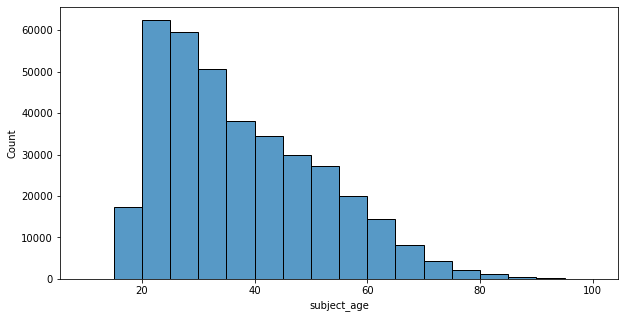

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=data, x='subject_age', binwidth=5);

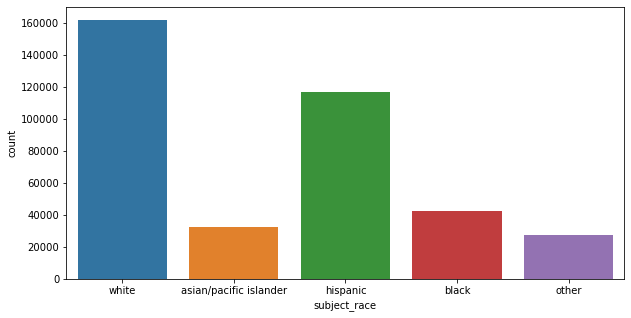

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=data, x='subject_race');

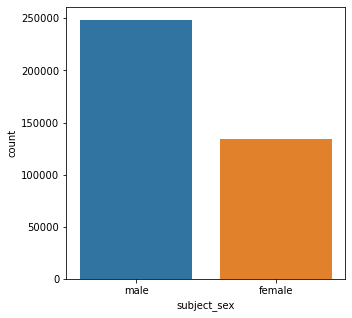

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(data=data, x='subject_sex');

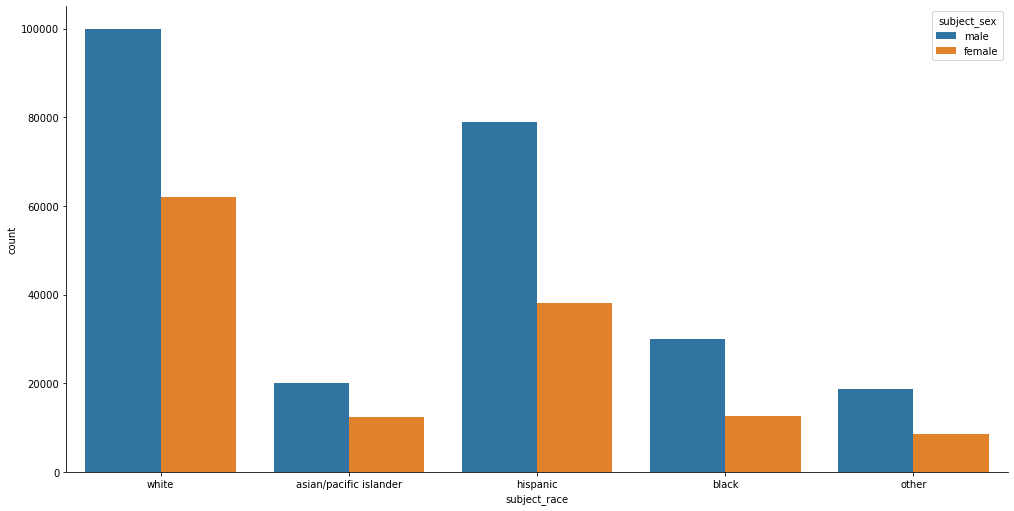

In [8]:
pivot = data.pivot_table(index = 'subject_race', columns ='subject_sex' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_race', hue="subject_sex", 
          data=data, 
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);


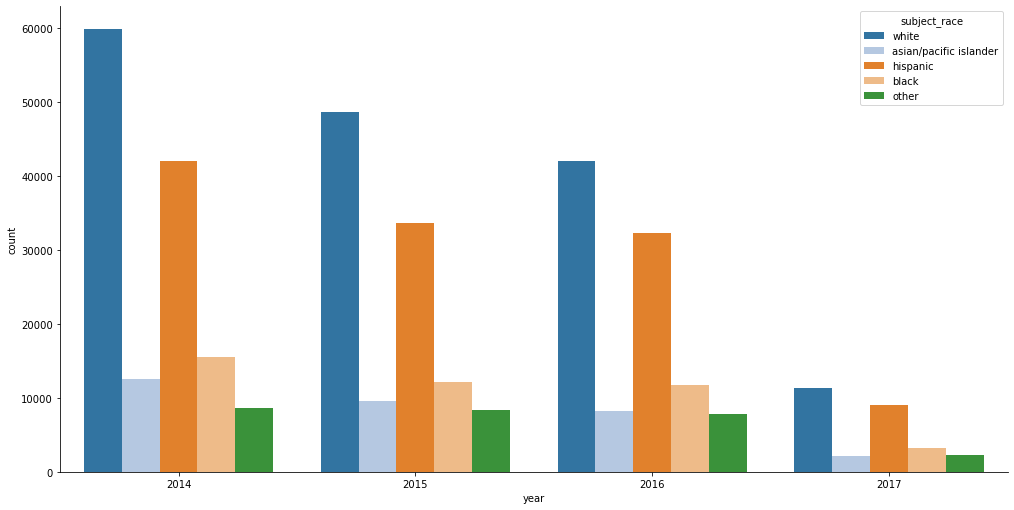

In [9]:
pivot = data.pivot_table(index = 'year', columns ='subject_race' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='year', hue="subject_race", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);

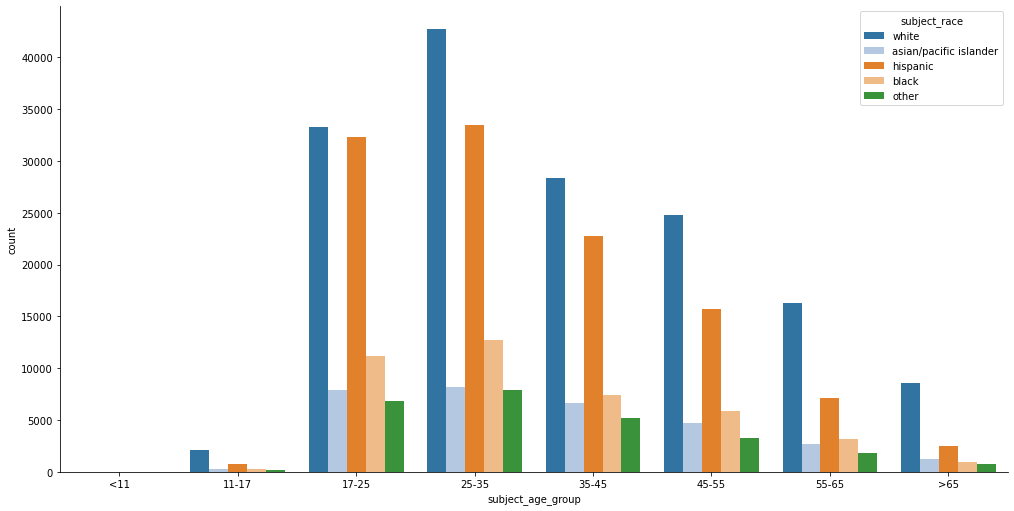

In [10]:
pivot = data.pivot_table(index = 'subject_age_group', columns ='subject_race' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_age_group', hue="subject_race", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);

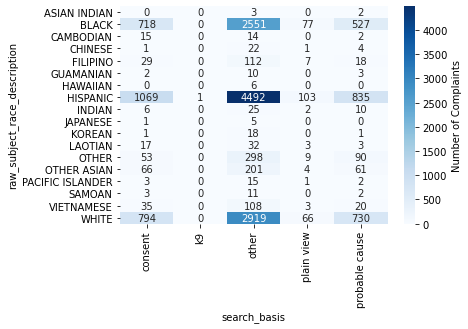

In [11]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_basis' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

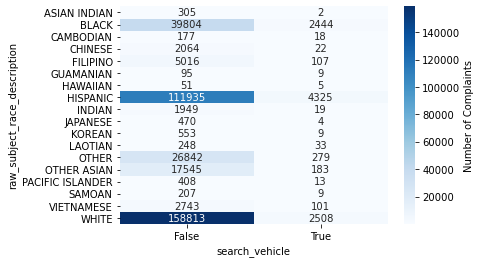

In [12]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_vehicle' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

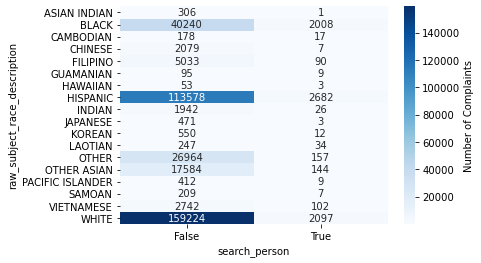

In [13]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_person' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

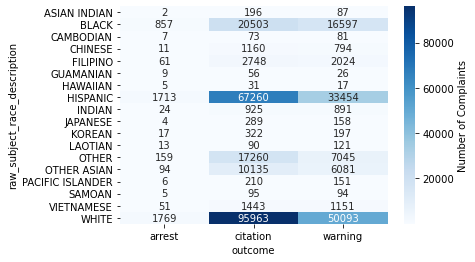

In [14]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='outcome' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

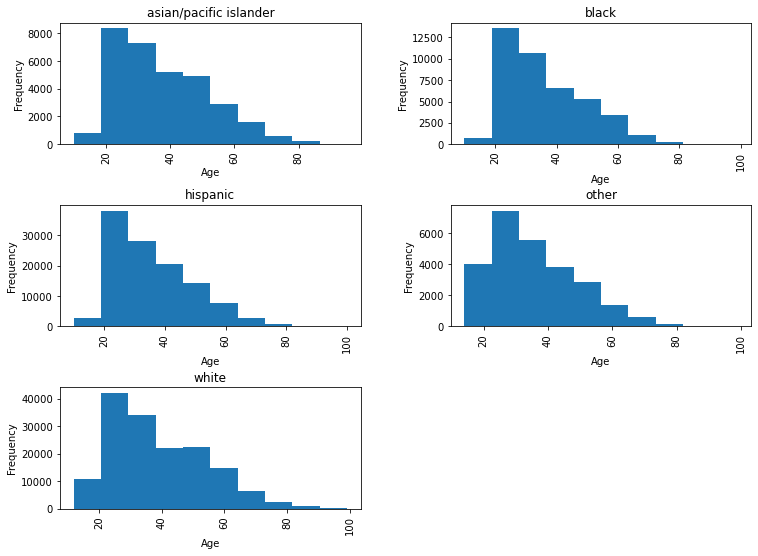

In [15]:
# Plotting the distribution of complaints for age_incident in both complainant and MOS for each MOS ethnicity
axarr = data[['subject_age']].hist(by=data['subject_race'], figsize =(12,9));
#plt.suptitle("Frequency of Age Incident in Both Complainant and Officer's for Each Officer's Ethnicity", 
#             ha='center', fontsize='xx-large');
for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")

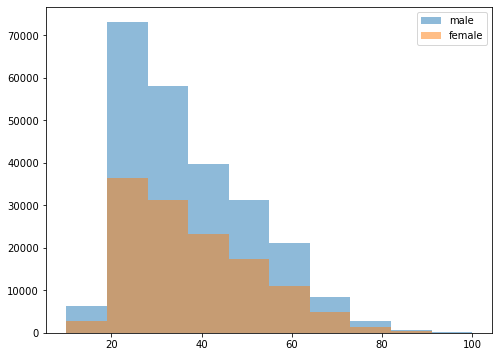

In [16]:
data['subject_sex'] = data['subject_sex'].astype(str)
plt.figure(figsize=(8,6))
plt.hist(data[data['subject_sex'] == 'male'].subject_age, alpha=0.5, label="male")
plt.hist(data[data['subject_sex'] == 'female'].subject_age, alpha=0.5, label="female")
plt.legend(loc='upper right')
plt.show()

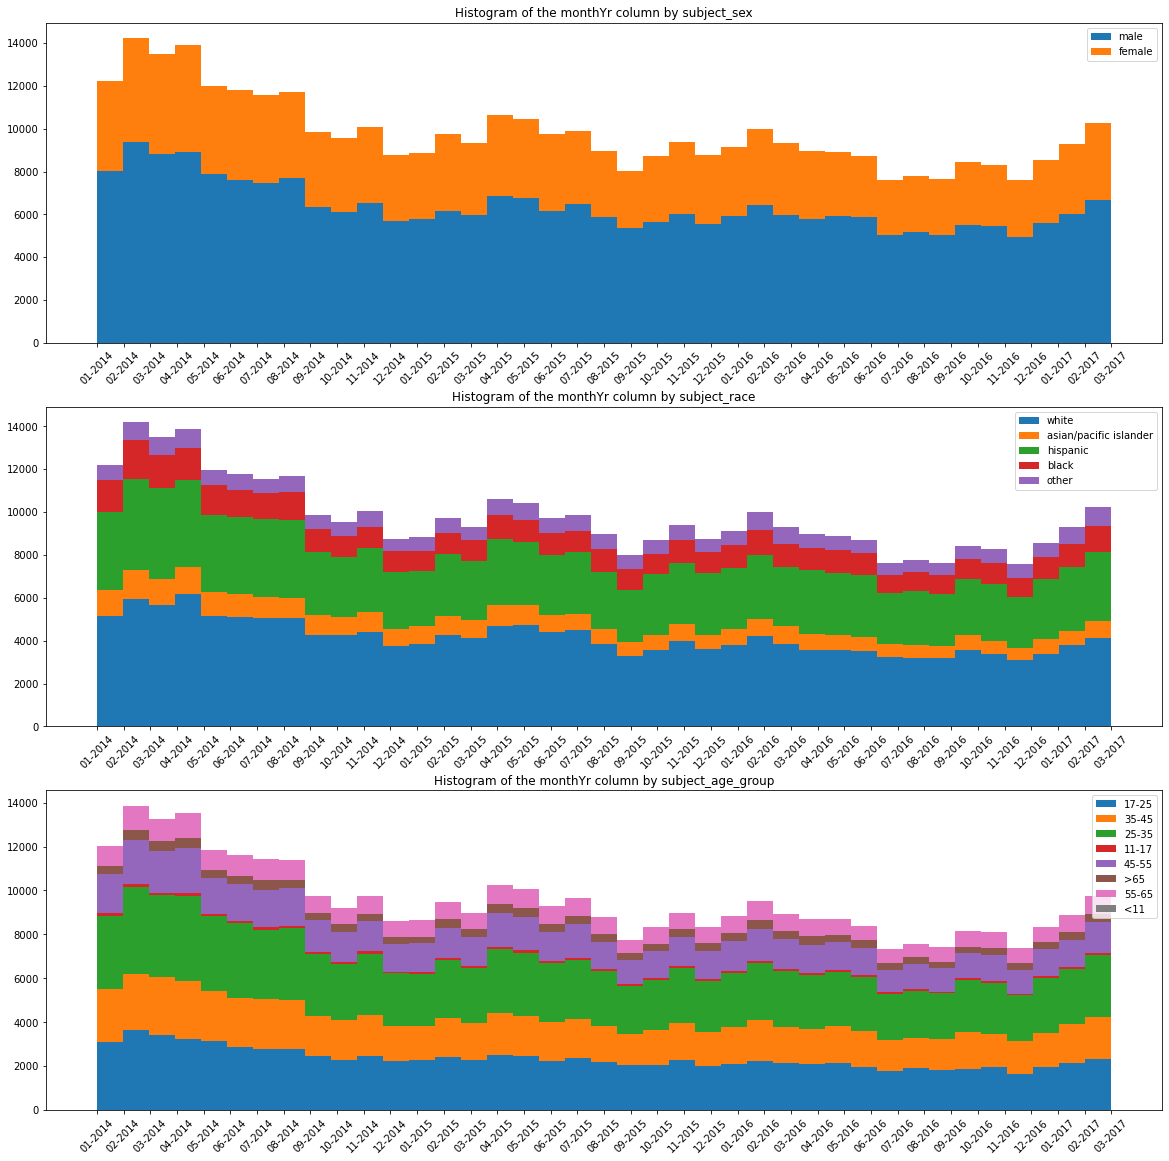

In [17]:
def plot_histo(data, col, Y_columns):
    df = data.copy()
    fig, axs = plt.subplots(3,1,figsize=(20,20))
    
    for i in range(0,3):
        if i == 3:
            cnt = []; y_col = Y_columns[i]
            Y_values = df[y_col].dropna().drop_duplicates().values
            for val in Y_values:
                cnt += [df[df[y_col] == val][col].values]
            bins = df[col].nunique()


            axs[i].hist(cnt,histtype='barstacked', bins=bins, stacked=True, )
            axs[i].legend(Y_values,loc='best')
            for tick in axs[i].get_xticklabels():
                tick.set_rotation(45)
            axs[i].set_title("Histogram of the "+col+" column by "+y_col)
        else:
            cnt = []; y_col = Y_columns[i]
            Y_values = df[y_col].dropna().drop_duplicates().values
            for val in Y_values:
                cnt += [df[df[y_col] == val][col].values]
            bins = df[col].nunique()


            axs[i].hist(cnt,histtype='barstacked', bins=bins, stacked=True)
            axs[i].legend(Y_values,loc='best')
            for tick in axs[i].get_xticklabels():
                tick.set_rotation(45)
            axs[i].set_title("Histogram of the "+col+" column by "+y_col)


    plt.show()

plot_histo(data, col='monthYr',Y_columns=['subject_sex', 'subject_race','subject_age_group'])

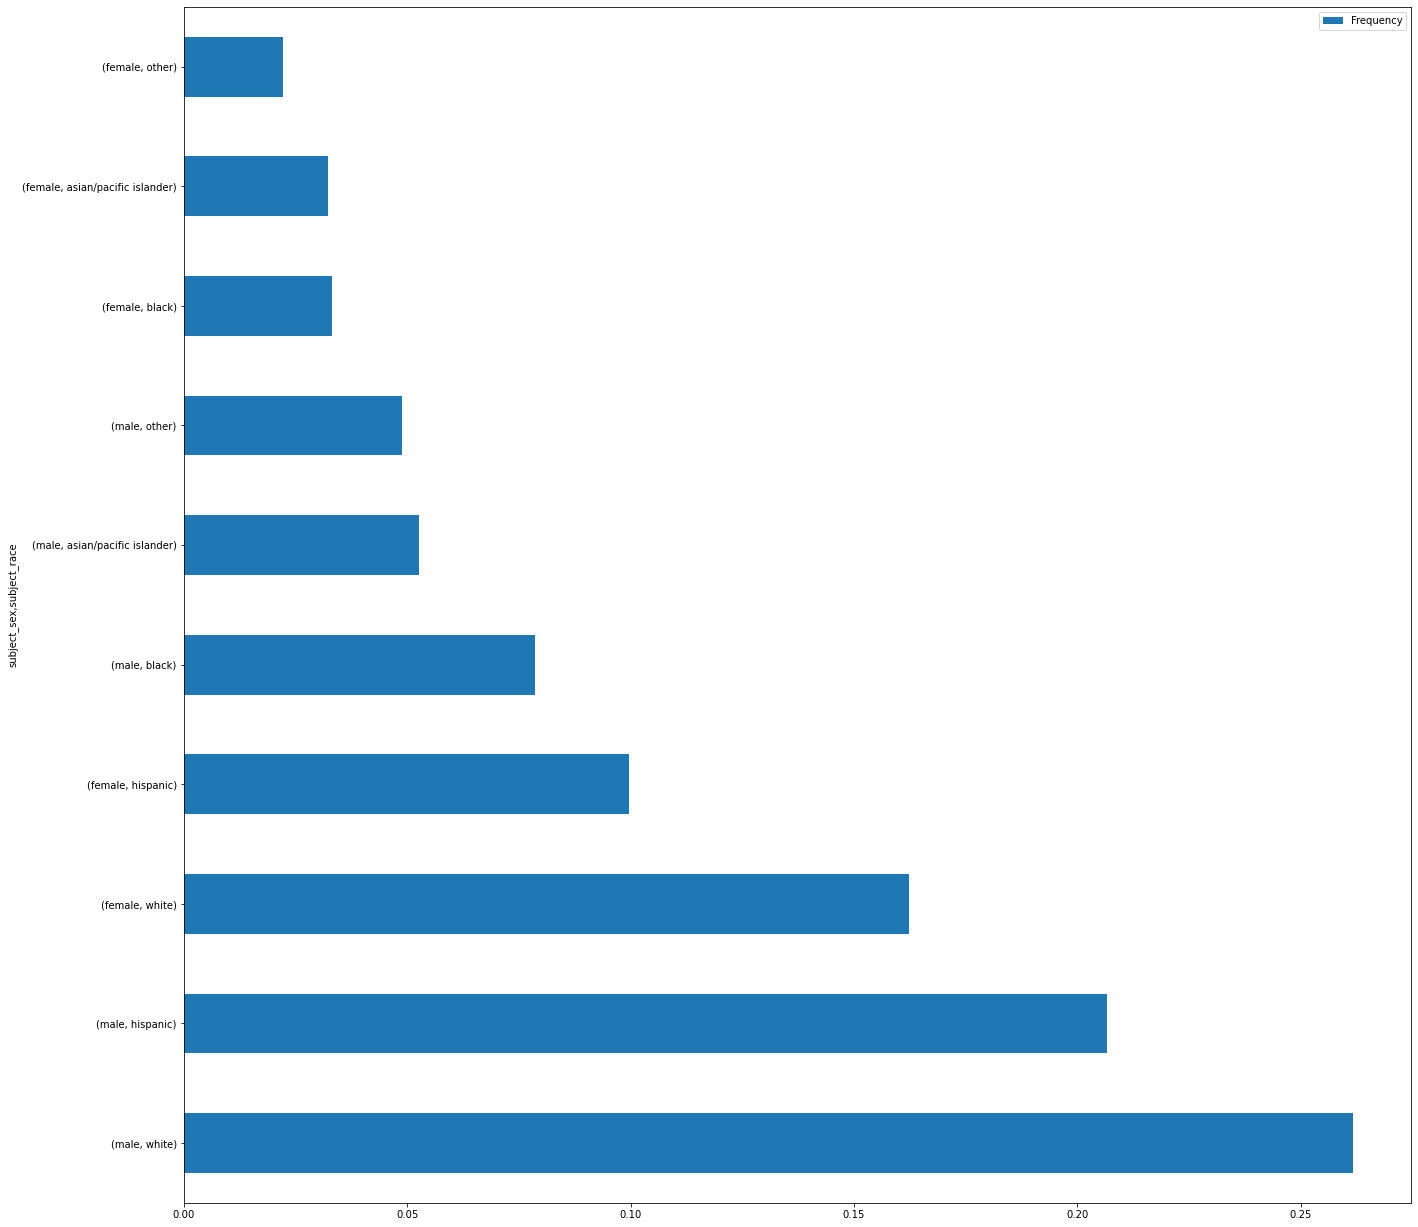

In [18]:
data['Frequency'] = 1
freq_target = data[['subject_sex', 'subject_race', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_sex', 'subject_race']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));

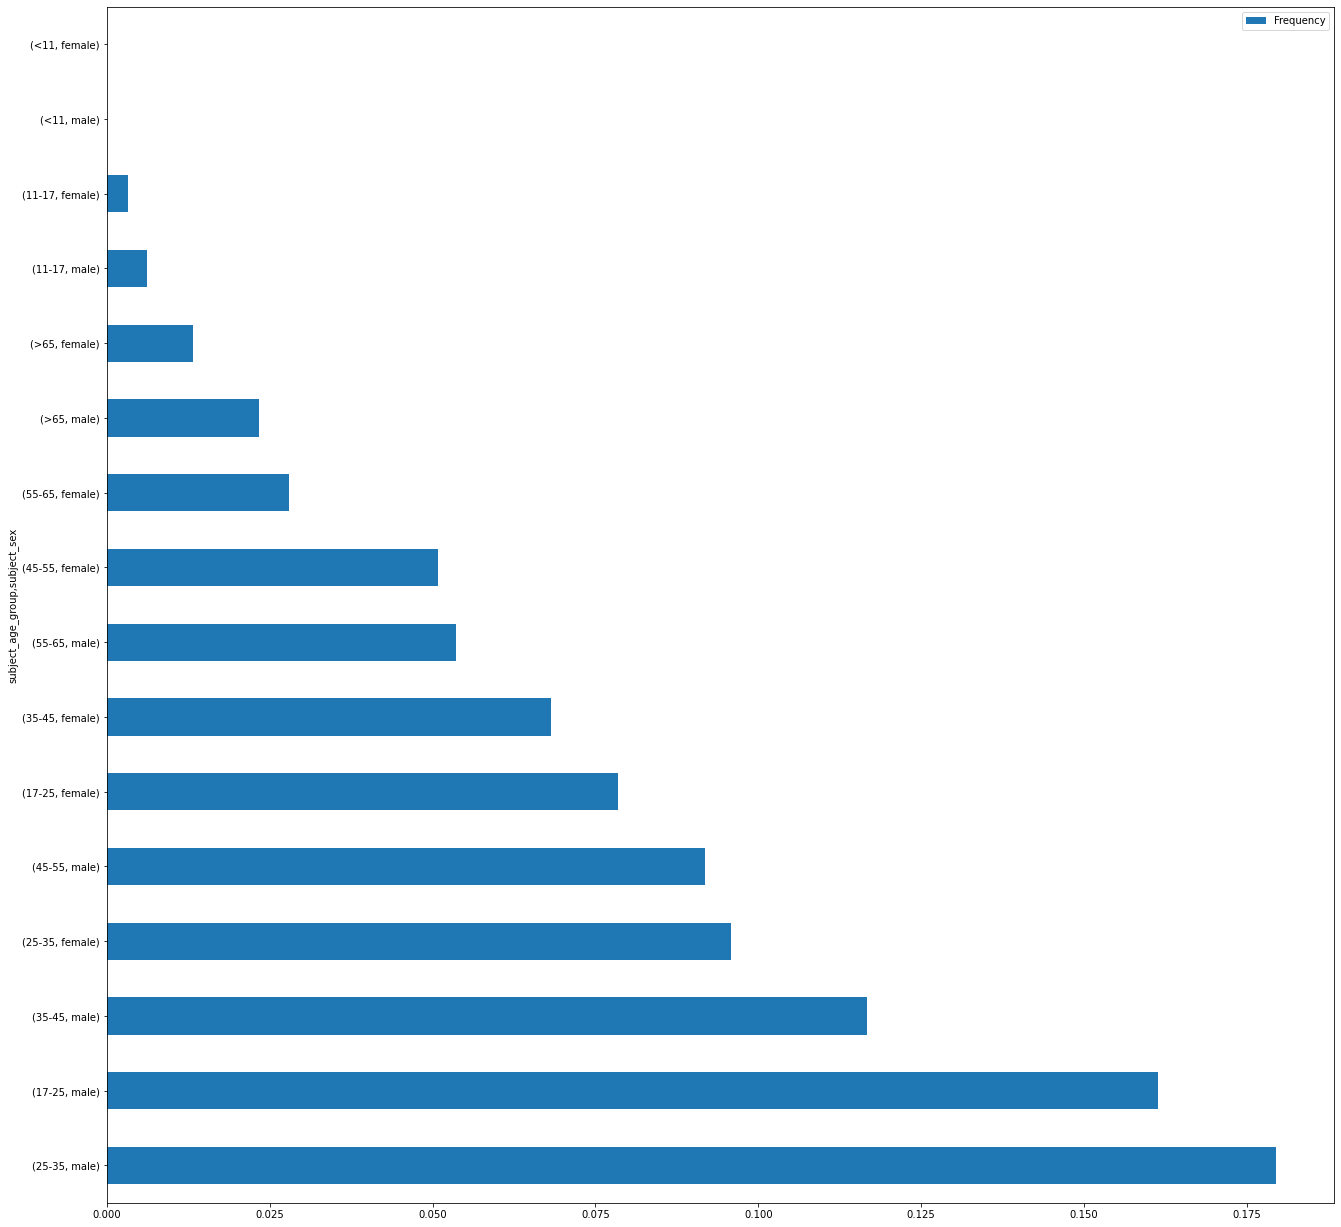

In [19]:
data['Frequency'] = 1
freq_target = data[['subject_age_group', 'subject_sex', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_age_group', 'subject_sex']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));

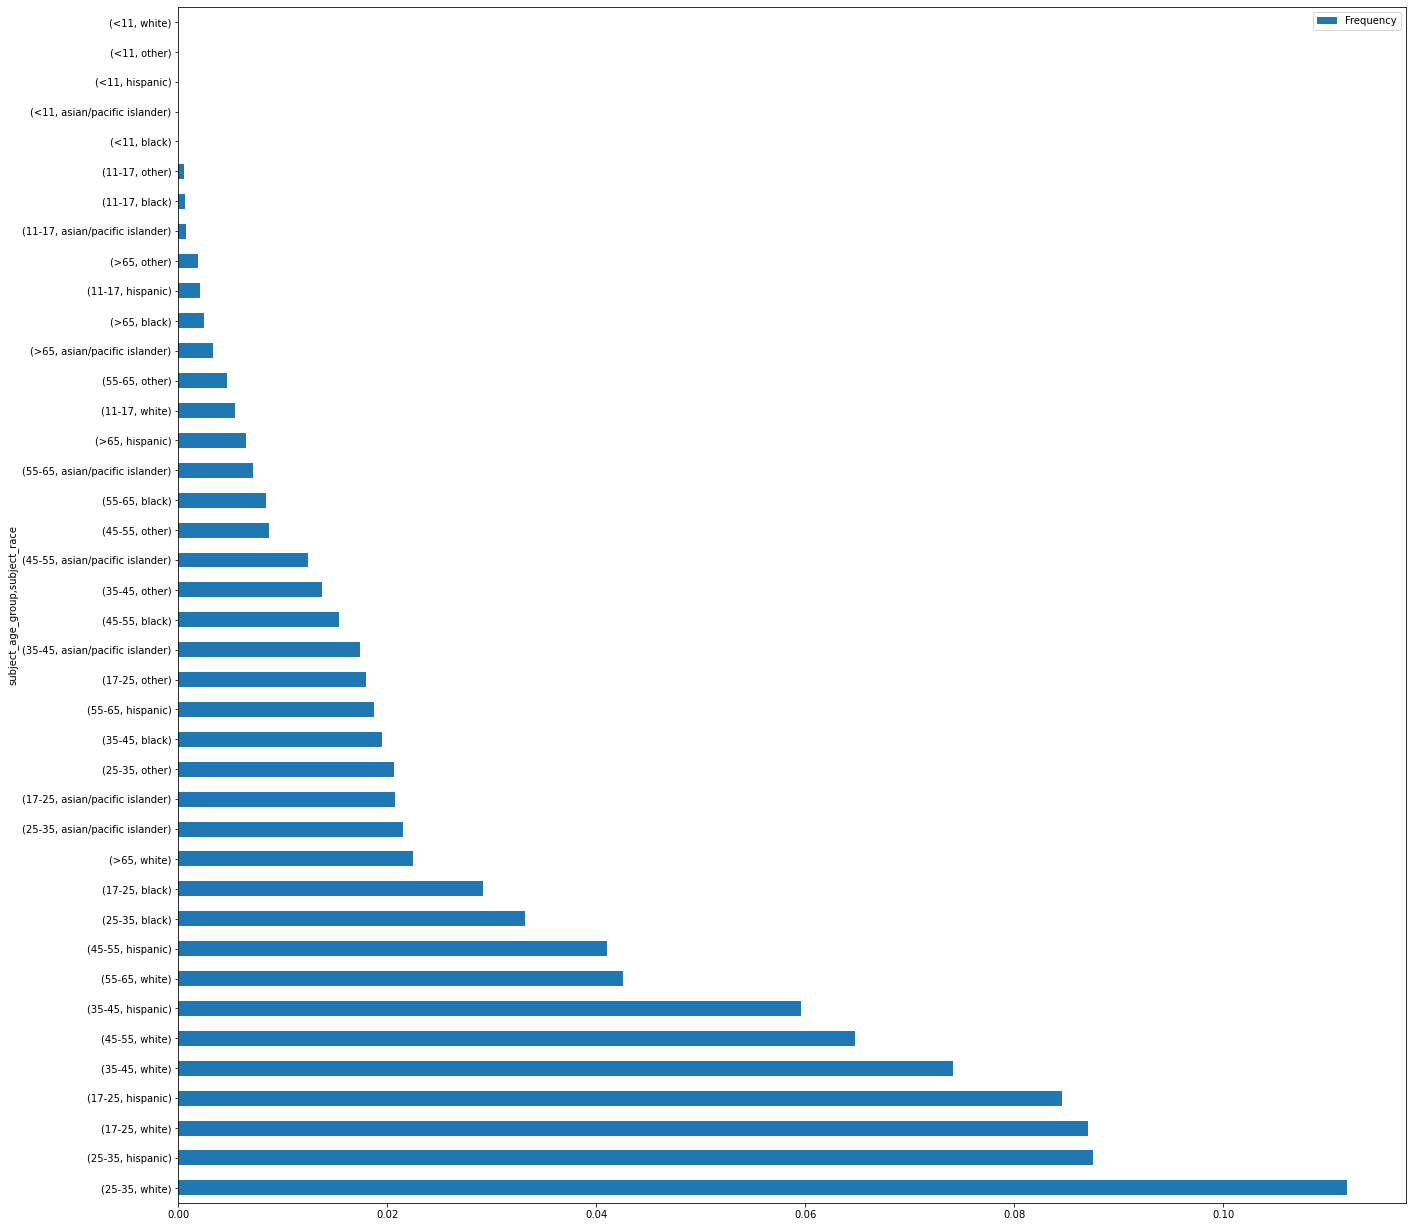

In [20]:
data['Frequency'] = 1
freq_target = data[['subject_age_group', 'subject_race', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_age_group', 'subject_race']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));

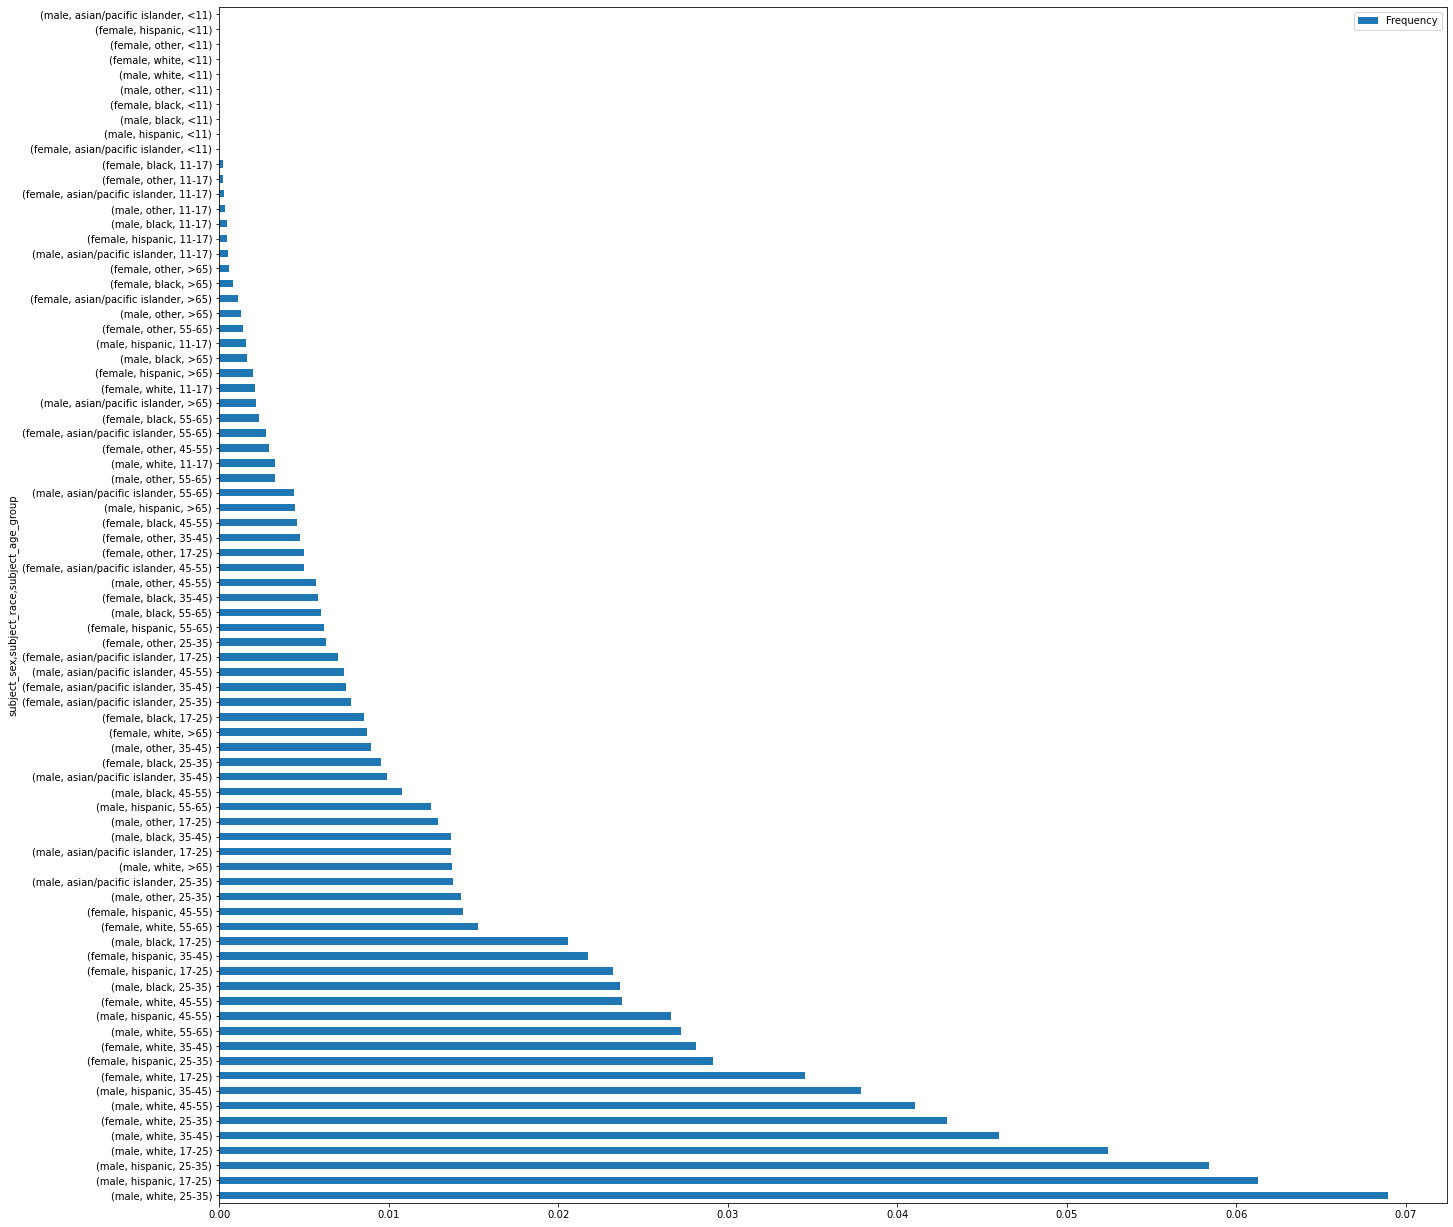

In [21]:
data['Frequency'] = 1
freq_target = data[['subject_sex', 'subject_race', 'subject_age_group', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_sex', 'subject_race', 'subject_age_group']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));